# CA2 - MSC in Data Analytics

### Statistics



In [1]:
import pandas as pd 
import numpy as np 
import statistics
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("out.csv")

In [3]:
dataset = dataset[["Area", "Year", "import_value", "export_value", "Temperature"]]

In [4]:
dataset.describe()

,Year,import_value,export_value,Temperature
count,29913.000000,2.991300e+04,2.991300e+04,29913.000000
mean,2009.866145,-6.538190e-17,1.784938e-16,1.346452
std,5.993868,1.000000e+00,1.000000e+00,0.660477
min,2000.000000,-3.087793e-01,-2.186534e-01,-0.320000
25%,2005.000000,-3.063880e-01,-2.186206e-01,0.878000
50%,2010.000000,-2.900560e-01,-2.178003e-01,1.345000
75%,2015.000000,-2.008851e-01,-1.979468e-01,1.722000
max,2020.000000,8.798550e+00,1.585056e+01,3.305000


(array([1123.,  754., 3685., 4787., 8520., 4819., 3964.,  571., 1370.,
         320.]),
 array([-0.32  ,  0.0425,  0.405 ,  0.7675,  1.13  ,  1.4925,  1.855 ,
         2.2175,  2.58  ,  2.9425,  3.305 ]),
 <BarContainer object of 10 artists>)

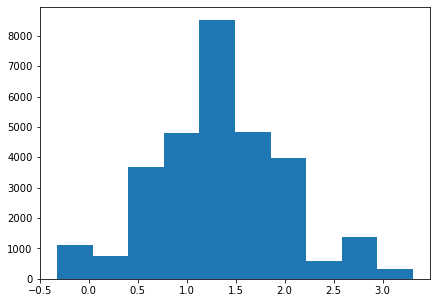

In [5]:
plt.figure(figsize=(7,5))
plt.hist(dataset.Temperature)

(array([2.897e+04, 2.710e+02, 2.850e+02, 1.560e+02, 6.400e+01, 1.080e+02,
        4.400e+01, 5.000e+00, 5.000e+00, 5.000e+00]),
 array([-0.2186534 ,  1.38826754,  2.99518848,  4.60210942,  6.20903037,
         7.81595131,  9.42287225, 11.02979319, 12.63671414, 14.24363508,
        15.85055602]),
 <BarContainer object of 10 artists>)

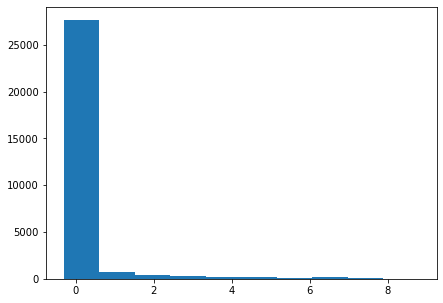

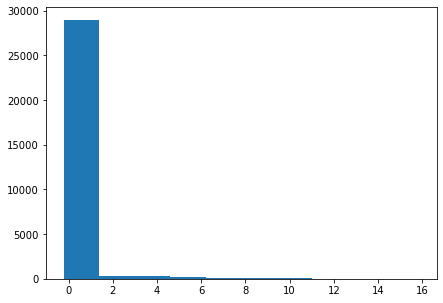

In [6]:
plt.figure(figsize=(7,5))
plt.hist(dataset.import_value)
plt.figure(figsize=(7,5))
plt.hist(dataset.export_value)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f871debd040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f871debd700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f871de29ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f871debddc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f871dec9160>],
 'means': []}

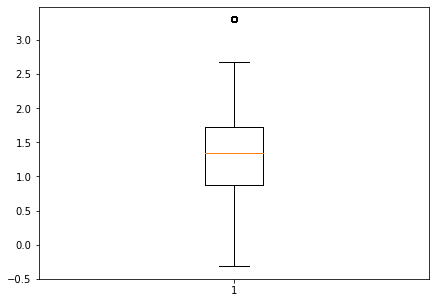

In [7]:
plt.figure(figsize=(7,5))
plt.boxplot(dataset.Temperature)

### Z-Test

In [8]:
from statsmodels.stats.weightstats import ztest as ztest

In [9]:
dataset1 = dataset[["Temperature"]]

In [11]:
ztest(dataset1, value=1.34)

(array([1.68954509]), array([0.09111502]))

Since this p-value is not less than .05, we do not have sufficient evidence to reject the null hypothesis. In other words, the temperature does not significantly affect import and export.

### Two sample Z-test

In [12]:
import_list = dataset["import_value"]
export_list = dataset["export_value"]

In [13]:
import_array = np.array(import_list)
export_array = np.array(export_list)

In [14]:
#find variance for each group
print(np.var(import_array), np.var(export_array))

0.9999665697188458 0.9999665697188483


The ratio of the larger sample variance to the smaller sample variance is 0.99 / 0.99 = 1, which is less than 4. This means we can assume that the population variances are equal.

Thus, we can proceed to perform the two sample t-test with equal variances:

In [15]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=import_array, b=export_array, equal_var=True)

Ttest_indResult(statistic=-4.880389703582328e-15, pvalue=0.9999999999999961)

The t test statistic is -4.8803 and the corresponding two-sided p-value is 0.9999.

Because the p-value of our test (0.9999) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height between the import and export is different.